In [ ]:
import pandas as pd

import warnings     # filter warning messages
warnings.simplefilter(action="ignore")

In [ ]:
# Read and display the training data
house_data_train = pd.read_csv('train.csv').drop(columns=['Unnamed: 0', 'zipcode'])
house_data_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [ ]:
# Read and display the testing data
house_data_test = pd.read_csv('test.csv').drop(columns=['Unnamed: 0', 'id', 'date', 'zipcode'])
house_data_test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,700000.0,4,2.00,1830,4590,2.0,0,0,3,8,1830,0,1908,0,47.6593,-122.327,1650,4590
1,270000.0,3,2.00,1560,8853,1.0,0,0,3,7,1560,0,1967,0,47.4312,-122.171,1610,8750
2,258000.0,4,1.75,1730,8320,1.0,0,0,3,7,1230,500,1977,0,47.3270,-122.361,1840,9800
3,530000.0,3,2.50,1930,7214,2.0,0,0,3,8,1930,0,2005,0,47.7191,-122.309,1930,7266
4,245000.0,3,2.25,1422,3677,2.0,0,0,3,7,1422,0,2012,0,47.3204,-122.178,1677,3677


In [ ]:
from sklearn.preprocessing import StandardScaler

# Make a copy of the original data
house_data_train_nz = house_data_train.copy()
house_data_test_nz = house_data_test.copy()

# Normalize all columns except the first one
scaler = StandardScaler()
house_data_train_nz.iloc[:, 1:] = scaler.fit_transform(house_data_train_nz.iloc[:, 1:])
house_data_test_nz.iloc[:, 1:] = scaler.fit_transform(house_data_test_nz.iloc[:, 1:])

# Divide values of the first column by 1000
house_data_train_nz.iloc[:, 0] /= 1000
house_data_test_nz.iloc[:, 0] /= 1000

# Display the modified training data
house_data_train_nz.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221.9,-0.409823,-1.449888,-0.981646,-0.312717,-0.863477,-0.089803,-0.309908,-0.673452,-0.522576,-0.722231,-0.667586,-0.498602,-0.206760,-0.270431,-0.355193,-0.965637,-0.312858
1,538.0,-0.409823,0.283184,0.584578,-0.257719,1.070402,-0.089803,-0.309908,-0.673452,-0.522576,0.531438,0.219976,-0.640563,4.828896,1.211219,-0.799830,-0.443330,-0.233556
2,180.0,-1.584103,-1.449888,-1.443625,-0.162440,-0.863477,-0.089803,-0.309908,-0.673452,-1.384913,-1.241427,-0.667586,-1.279387,-0.206760,1.330570,-0.183076,1.093745,-0.216690
3,604.0,0.764456,1.323028,-0.102758,-0.335172,-0.863477,-0.089803,-0.309908,2.229358,-0.522576,-0.886854,1.351617,-0.143700,-0.206760,-0.202634,-1.330526,-0.935790,-0.338774
4,510.0,-0.409823,-0.063430,-0.418256,-0.228769,-0.863477,-0.089803,-0.309908,-0.673452,0.339761,-0.089065,-0.667586,0.637085,-0.206760,0.475338,1.165179,-0.279176,-0.238978


In [ ]:
# Assign response variable (y) and features (X) for training and test data
y_train = house_data_train_nz.iloc[:, 0]
X_train = house_data_train_nz.iloc[:, 1:]

y_test = house_data_test_nz.iloc[:, 0]
X_test = house_data_test_nz.iloc[:, 1:]

In [ ]:
from sklearn.linear_model import LinearRegression

# fit the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Display model intercept
print(f'Model Intercept: {model.intercept_:.3f}\n')

# Round the coefficients to two decimal places
rounded_coefs = [round(coef, 3) for coef in model.coef_]

# Create a DataFrame to associate coefficients with feature names
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': rounded_coefs})

# Display the DataFrame
print(coef_df)

Model Intercept: 520.415

          Feature  Coefficient
0        bedrooms      -12.522
1       bathrooms       18.528
2     sqft_living       56.749
3        sqft_lot       10.882
4          floors        8.044
5      waterfront       63.743
6            view       48.200
7       condition       12.964
8           grade       92.231
9      sqft_above       48.290
10  sqft_basement       27.137
11       yr_built      -67.643
12   yr_renovated       17.271
13            lat       78.376
14           long       -1.035
15  sqft_living15       45.578
16     sqft_lot15      -12.930


In [ ]:
from sklearn.metrics import mean_squared_error as MSE, r2_score

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate and display Mean Squared Error (MSE)
mse_train = MSE(y_train, y_train_pred)
print('Mean Squared Error (MSE) on Training Set:', f'{mse_train:.3f}')

# Calculate and R-squared (R^2) score
r2_train = r2_score(y_train, y_train_pred)
print('R-squared (R^2) Score on Training Set:', f'{r2_train:.3f}')

Mean Squared Error (MSE) on Training Set: 31486.168
R-squared (R^2) Score on Training Set: 0.727


In [ ]:
from sklearn.metrics import mean_squared_error as MSE, r2_score

# Predict on the training set
y_test_pred = model.predict(X_test)

# Calculate and display Mean Squared Error (MSE)
mse_test = MSE(y_test, y_test_pred)
print('Mean Squared Error (MSE) on Testing Set:', f'{mse_test:.3f}')

# Calculate and R-squared (R^2) score
r2_test = r2_score(y_test, y_test_pred)
print('R-squared (R^2) Score on Testing Set:', f'{r2_test:.3f}')

Mean Squared Error (MSE) on Testing Set: 59784.366
R-squared (R^2) Score on Testing Set: 0.641


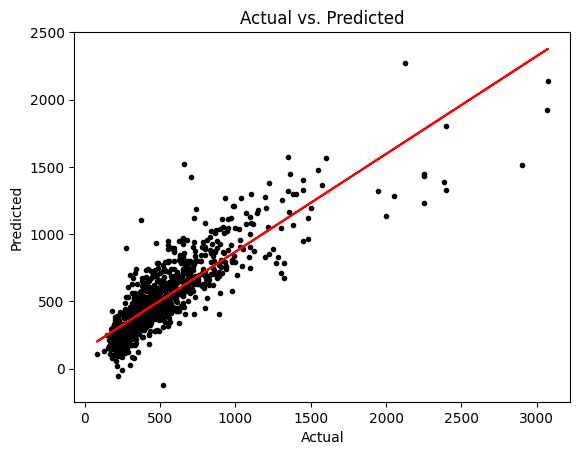

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the slope (m) and intercept (b) of the regression line
m, b = np.polyfit(y_train, y_train_pred, 1)

# Plotting the model
plt.scatter(y_train, y_train_pred, marker='.', color='k')

# Plot the line of best fit
plt.plot(y_train, m*y_train + b, color='red', label='Line of Best Fit')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

